In [8]:
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns 
import re
from scipy.special import boxcox1p
from scipy import stats
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import BayesianRidge
from sklearn import metrics
from sklearn.metrics import r2_score
# ---------

In [9]:
data_set=pd.read_csv('Real estate.csv')
ds=data_set.copy()
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction date                     414 non-null    float64
 1   house age                            414 non-null    float64
 2   distance to the nearest MRT station  414 non-null    float64
 3   number of convenience stores         414 non-null    int64  
 4   latitude                             414 non-null    float64
 5   longitude                            414 non-null    float64
 6   house price of unit area             414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


distance to the nearest MRT station   -0.673613
house age                             -0.210567
transaction date                       0.087491
longitude                              0.523287
latitude                               0.546307
number of convenience stores           0.571005
house price of unit area               1.000000
Name: house price of unit area, dtype: float64


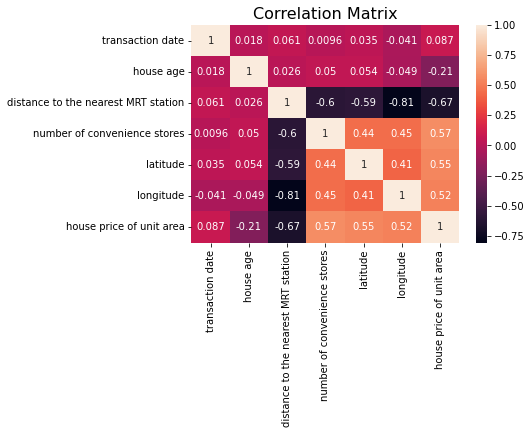

In [10]:
corr1=ds.corr()['house price of unit area']
print(corr1.sort_values())
corr=ds.corr()
sns.heatmap(corr,annot=True)
plt.title('Correlation Matrix', fontsize=16);
plt.show()


In [11]:
X = ds.drop(columns=['house price of unit area'],axis=1)
Y = ds['house price of unit area']


In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)


scaler= StandardScaler()
scaler.fit(x_train)
x_train= scaler.transform(x_train)
x_test= scaler.transform(x_test)

# Linear regression
1- undefit: regularization (L1 , L2) keep all feature but reduce magnitude of parameters.
2- high bias: value of pridction differs from target value. 

# Multiple linear regression
ability to identify outlier.

In [15]:
LinearRegression_model = LinearRegression()
LinearRegression_model.fit(x_train, y_train)            # fit model to input training instance
y_pred = LinearRegression_model.predict(x_test)         # prediction on testing instances 

test_score_linear=r2_score(y_test,y_pred)               # evaluate performance
print(f"Test score for linear model:  {test_score_linear}")


Test score for linear model:  0.5418646463779299


# lasso regression

In [16]:
#~~~~~~~~~~~~~~~~~~using Lasso~~~~~~~~~~~~~~~~~~~~~
lambda_grid = 10 ** np.linspace(1, -3, 100)
# iterating to get the best alpha according to the r2_score
score=[]
for x in lambda_grid:
    lasso = linear_model.Lasso(alpha=x)
    lasso.fit(x_train,y_train)
    lasso_fit_coeff=lasso.coef_ # to know which feature/input has the most effect
#     print('alpha = ')
#     print(x)
#     print('\n')
#     print(np.sort(lasso_fit_coeff))
    y_pred_lasso=lasso.predict(x_test)
    test_score_lasso = lasso.score(x_test,y_test) 
    score.append(test_score_lasso)
#     print(f"Test score for ridge model:  {test_score_lasso}")
    
#-----------------calculate mse--------------------
#     mse = np.mean((y_pred_lasso - y_train)**2)
n_alpha=lambda_grid[score.index(np.max(score))]
print(f"alpha:  {n_alpha}")   

lasso = linear_model.Lasso(alpha=n_alpha )
lasso.fit(x_train,y_train)
lasso_fit_coeff=lasso.coef_ # to know which feature/input has the most effect
y_pred_lasso=lasso.predict(x_test)
# cost_lasso=np.sqrt(mean_squared_error(y_train,pred_train_lasso))

# test_score_lasso = lasso.score(x_test,y_test) 
# score.append(test_score_lasso)





# print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
# print(r2_score(y_train, pred_train_lasso))

# pred_test_lasso= model_lasso.predict(X_test)
# print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
# print(r2_score(y_test, pred_test_lasso))



# print(np.sqrt(matrics.mean_squared_error(y_test,pred_test_lasso))) 
test_score_lasso = r2_score(y_test,y_pred_lasso)    
print(f"Test score for ridge model:  {test_score_lasso}")

#~~~~~~~~~~~~~~~~~~~~~~~~~using lassoCv~~~~~~~~~~~~~~~~~~
# lassocv = LassoCV(alphas = lambda_grid, cv = 10)
# lassocv.fit(x_train, y_train)
# print(f"alpha:  {lassocv.alpha_}")
# lassoreg = Lasso(alpha = lassocv.alpha_)
# lassoreg.fit(x_train, y_train)
# pred_lasso = lassoreg.predict(x_test)

# test_score_lassoCV = lasso.score(x_test,y_test) 
# # score.append(test_score_lassoCV)
    
# test_score_lassoCV = r2_score(y_test,pred_lasso)    
# print(f"Test score for ridge model:  {test_score_lassoCV}")

alpha:  0.001
Test score for ridge model:  0.5418322359357248


# Ridge model
minimizes the loss encountered in linear regression.    Reduces the complexity of the ML model.
not all the coefficients are reduced in ridge regression, but it reduces the coefficients to a greater extent as compared to other models.
Ridge is good when the predicting power of your dataset is spread out over the different features: it will not zero out features that could be helpful when making predictions but will simply reduce the weight of most variables in the model.
ridge regression takes the square of the coefficients and lasso takes the magnitude.

In [17]:
alpha=[0.001,0.01,0.5,1,5,10]
score=[]
costs=[]
for x in alpha:
    ridge_model= Ridge(alpha=x)                         # build an ridge regression model (L2 regularization) as increasing alpha we are moving from overfit to underfit.
    ridge_model.fit(x_train , y_train)                  # train the model on dataset to compute coeffcient.
    y_predR = ridge_model.predict(x_test)               # predict the unit price for 30% remaining data.

    y_list= y_test.values.tolist()                      # list contain price of each unit. 
    # compute loss 
    m= len(y_list)                                      # size of predicted units price
    ridge_Loss=0
    for i in range(m):
        ridge_Loss += (y_list[i] - y_predR[i] )**2      
    cost = ridge_Loss * (1/m)                           # calculatin cost function = 1/m * (y-yhat)**2
    print(f"alpha =  {x}")  
    print(f"cost:  {cost}")
    
    test_score_ridge = r2_score(y_test,y_predR)             # (total variance explained by model) / total variance.
                                                            # So if it is 100%, the two variables are perfectly correlated, with no variance at all.
    print(f"Test score for ridge model:  {test_score_ridge} \n")


    #train_score = ridge_model.score(x_train , y_train)
    #print(f"Train score for ridge model:  {train_score}")

    
    score.append(test_score_ridge)
    costs.append(cost)

 
test_score_ridge=np.max(score)
print(test_score_ridge)
print(np.min(costs))

# ridge_model= Ridge(alpha=5)
# ridge_model.fit(x_train , y_train)
# y_predR = ridge_model.predict(x_test)

# y_list= y_test.values.tolist()

# # compute loss 
# ridge_Loss=0
# for i in range(len(y_list)):
#     ridge_Loss = ridge_Loss + (y_list[i] - y_predR[i] )**2    
# print(f"loss:  {ridge_Loss}")

# #train_score = ridge_model.score(x_train , y_train)
# test_score_ridge = r2_score(y_test,y_predR)
# #print(f"Train score for ridge model:  {train_score}")
# print(f"Test score for ridge model:  {test_score_ridge}")


alpha =  0.001
cost:  105.5658981392253
Test score for ridge model:  0.54186430958163 

alpha =  0.01
cost:  105.56659660394828
Test score for ridge model:  0.5418612783790944 

alpha =  0.5
cost:  105.60464433190344
Test score for ridge model:  0.5416961585589364 

alpha =  1
cost:  105.64350083845389
Test score for ridge model:  0.5415275287952577 

alpha =  5
cost:  105.95427911865511
Test score for ridge model:  0.540178810842996 

alpha =  10
cost:  106.33880340565383
Test score for ridge model:  0.5385100494076083 

0.54186430958163
105.5658981392253


# Bayes

In [130]:
# Creating & training model with the 0.7 
model = BayesianRidge()
model.fit(x_train, y_train)
   
# Model making a prediction on test data ##equation (())
prediction = model.predict(x_test) 

test_score_bayes=r2_score(y_test, prediction)
# Evaluating r2 score in the model against the test set
print(f"r2 Score Of Test Set : {test_score_bayes}")

r2 Score Of Test Set : 0.5393606250632437


# polynomial model


In [134]:

# Split the dataset into train and validation sets with 75% training set
# Set random_state=1
x_set, x_test, y_set, y_test = train_test_split(X,Y,test_size=0.2,train_size=0.8)
x_train, x_cv, y_train, y_cv = train_test_split(x_set,y_set,test_size = 0.25,train_size =0.75)
maxdeg=8
col_n=6

degree, validation_error = [],[] #first get poly_feat of training_set and of cv_set then 
                                        #fit a linear reg model for the training_set and cv_set
                                        #finally calculate the MSE of linReg model(x_train) and linReg model(x_cv)
                                        #the model will be the one with the lowest validation error
                                        #NOTE: i am saving the tarining error for the sake of plotting only .
col=['distance to the nearest MRT station','house age','transaction date','longitude','latitude','number of convenience stores']
for i in range (col_n):                                        
    validation_error = []
    for d in range(maxdeg):               
            # Compute the polynomial features for the current degree 
        x_poly_train = PolynomialFeatures(degree = d).fit_transform(x_train[col[i]].values.reshape(-1,1))
            # Compute the polynomial features for the validation set
        x_poly_val = PolynomialFeatures(degree = d).fit_transform(x_cv[col[i]].values.reshape(-1,1))
            # Initialize a linear regression model
        lreg = LinearRegression(fit_intercept=False)

            # Fit the model on the train data
        lreg.fit(x_poly_train, y_train)

            # Use the trained model to predict on the transformed train data
            #y_train_pred = lreg.predict(x_train)

            # Use the trained model to predict on the transformed validation data
        y_cv_pred = lreg.predict(x_poly_val)

            # Compute the MSE on the train predictions
            #degree.append(mean_squared_error(y_train, y_train_pred))

            # Compute the MSE on the validation predictions
        validation_error.append(metrics.mean_squared_error(y_cv, y_cv_pred))
    degree.append(validation_error.index(min(validation_error))+1)
degree_tuple = tuple(degree)
print(degree_tuple)    
   

(5, 5, 1, 8, 3, 7)


# comparison bet. accuracies

According to the graph best model is: Linear Model
[0.5418646463779297, 0.5418322359357248, 0.5418643095816299, 0.5393606250632437]


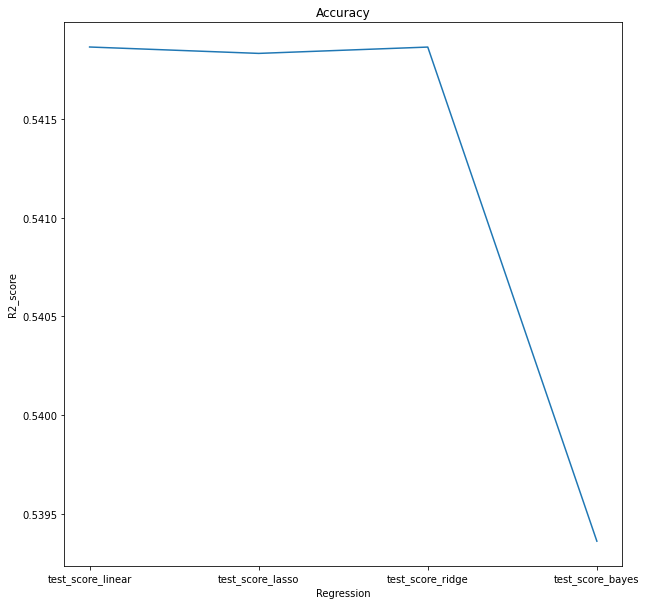

In [132]:
xaxis = ['test_score_linear','test_score_lasso','test_score_ridge','test_score_bayes']
yaxis = [test_score_linear,test_score_lasso,test_score_ridge,test_score_bayes]

# Check the max accuracy and print what is the best model
maxx = np.max(yaxis) 
if maxx == test_score_linear:
    print("According to the graph best model is: Linear Model")
elif maxx == test_score_lasso:
    print("According to the graph best model is: Lasoo Model")
elif maxx == test_score_ridge:
    print("According to the graph best model is: Ridge Model")
elif maxx == test_score_bayes:
    print("According to the graph best model is: Bayes Model")
# elif max == test_score_poly:
#     print("According to the graph best model is: Poly Model")

# creating the graph between different models in the system with their accuracy

print(yaxis)
fig = plt.figure(figsize=(10,10))
plt.plot(xaxis, yaxis)
plt.xlabel('Regression')
plt.ylabel('R2_score')
plt.title("Accuracy")
plt.show()